In [543]:
# pip install tensorflow_decision_forests 

In [544]:
import tensorflow as tf
import tensorflow_decision_forests as tfdf
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Comment this if the data visualisations doesn't work on your side
%matplotlib inline

In [545]:
print("TensorFlow v" + tf.__version__)
print("TensorFlow Decision Forests v" + tfdf.__version__)

TensorFlow v2.19.0
TensorFlow Decision Forests v1.12.0


In [546]:
train_file_path = "../data/train.csv"
dataset_df = pd.read_csv(train_file_path)
print("Full train dataset shape is {}".format(dataset_df.shape))

Full train dataset shape is (1460, 81)


In [547]:
dataset_df.head(3)


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500


In [548]:
dataset_df = dataset_df.drop('Id', axis=1)

In [549]:
dataset_df.head(20)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,1,2008,WD,Normal,118000


In [550]:
dataset_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64


/tmp/ipykernel_52915/3430012634.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset_df['SalePrice'], color='g', bins=100, hist_kws={'alpha': 0.4});


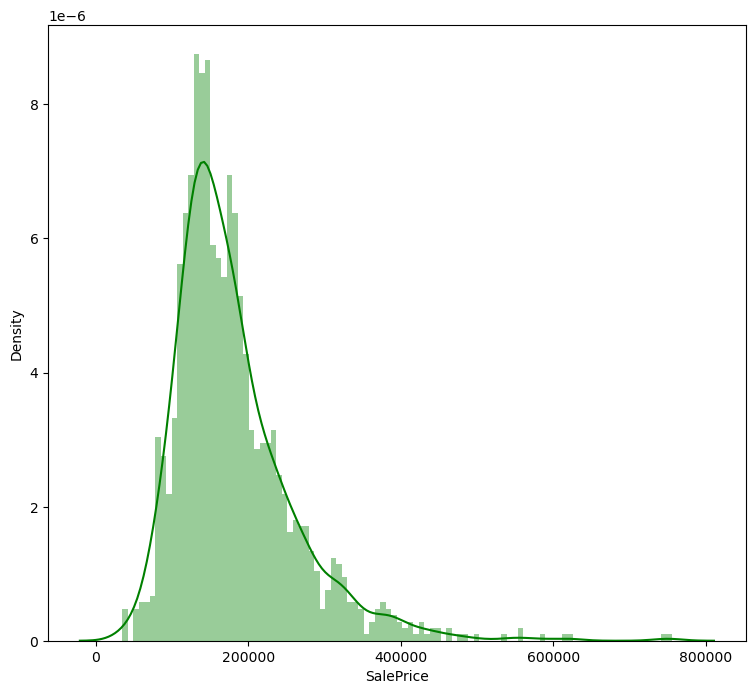

In [551]:
print(dataset_df['SalePrice'].describe())
plt.figure(figsize=(9, 8))
sns.distplot(dataset_df['SalePrice'], color='g', bins=100, hist_kws={'alpha': 0.4});

In [552]:
dataset_df['SalePrice']= dataset_df['SalePrice'].apply(lambda x: np.log(x))

/tmp/ipykernel_52915/3360898667.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset_df['SalePrice'], color='g', bins=100, hist_kws={'alpha': 0.4});


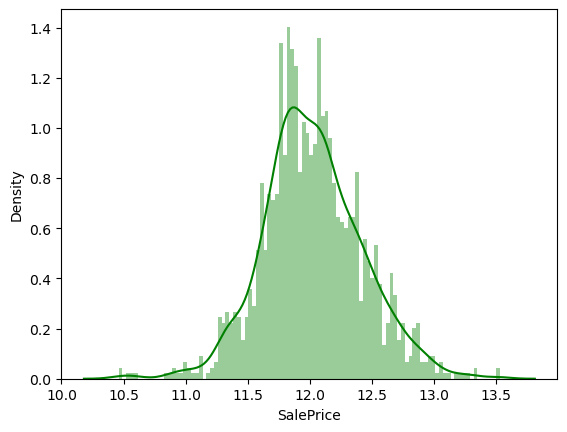

In [553]:
sns.distplot(dataset_df['SalePrice'], color='g', bins=100, hist_kws={'alpha': 0.4});

In [554]:
dataset_df['MSSubClass'] = dataset_df['MSSubClass'].astype(str)
dataset_df['OverallQual'] = dataset_df['OverallQual'].astype(int)
dataset_df['OverallCond'] = dataset_df['OverallCond'].astype(int)
# dataset_df['YearBuilt'] = dataset_df['YearBuilt'].astype(str)
# dataset_df['YearRemodAdd'] = dataset_df['YearRemodAdd'].astype(str)
# dataset_df['BsmtFullBath'] = dataset_df['BsmtFullBath'].astype(str)
# dataset_df['BsmtHalfBath'] = dataset_df['BsmtHalfBath'].astype(str)
# dataset_df['FullBath'] = dataset_df['FullBath'].astype(str)
# dataset_df['HalfBath'] = dataset_df['HalfBath'].astype(str)
dataset_df['BedroomAbvGr'] = dataset_df['BedroomAbvGr'].astype(int)
dataset_df['KitchenAbvGr'] = dataset_df['KitchenAbvGr'].astype(int)
dataset_df['TotRmsAbvGrd'] = dataset_df['TotRmsAbvGrd'].astype(int)
dataset_df['Fireplaces'] = dataset_df['Fireplaces'].astype(int)
# dataset_df['GarageYrBlt'] = dataset_df['GarageYrBlt'].astype(str)
dataset_df['GarageCars'] = dataset_df['GarageCars'].astype(str)
# dataset_df['MoSold'] = dataset_df['MoSold'].astype(str)
# dataset_df['YrSold'] = dataset_df['YrSold'].astype(str)

In [555]:
list(set(dataset_df.dtypes.tolist()))


[dtype('float64'), dtype('O'), dtype('int64')]

In [556]:
df_num = dataset_df.select_dtypes(include = ['float64', 'int64'])
df_num.head()

,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,65.0,8450,7,5,2003,2003,196.0,706,0,150,...,0,61,0,0,0,0,0,2,2008,12.247694
1,80.0,9600,6,8,1976,1976,0.0,978,0,284,...,298,0,0,0,0,0,0,5,2007,12.109011
2,68.0,11250,7,5,2001,2002,162.0,486,0,434,...,0,42,0,0,0,0,0,9,2008,12.317167
3,60.0,9550,7,5,1915,1970,0.0,216,0,540,...,0,35,272,0,0,0,0,2,2006,11.849398
4,84.0,14260,8,5,2000,2000,350.0,655,0,490,...,192,84,0,0,0,0,0,12,2008,12.429216


In [557]:
df_num.isna().sum()

LotFrontage      259
LotArea            0
OverallQual        0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
MasVnrArea         8
BsmtFinSF1         0
BsmtFinSF2         0
BsmtUnfSF          0
TotalBsmtSF        0
1stFlrSF           0
2ndFlrSF           0
LowQualFinSF       0
GrLivArea          0
BsmtFullBath       0
BsmtHalfBath       0
FullBath           0
HalfBath           0
BedroomAbvGr       0
KitchenAbvGr       0
TotRmsAbvGrd       0
Fireplaces         0
GarageYrBlt       81
GarageArea         0
WoodDeckSF         0
OpenPorchSF        0
EnclosedPorch      0
3SsnPorch          0
ScreenPorch        0
PoolArea           0
MiscVal            0
MoSold             0
YrSold             0
SalePrice          0
dtype: int64

In [558]:
# df_garage = dataset_df[['GarageType','GarageYrBlt','GarageFinish','GarageCars','GarageArea','GarageQual','GarageCond']][dataset_df[['GarageType','GarageYrBlt','GarageFinish','GarageCars','GarageArea','GarageQual','GarageCond']].isna().any(axis=1)]
# df_garage = dataset_df[['GarageType','GarageYrBlt','GarageFinish','GarageCars','GarageArea','GarageQual','GarageCond']][dataset_df['GarageType']=="NA"]
# (dataset_df['GarageCars'] == 0).sum()

# df_garage.tail(5)

<Axes: >

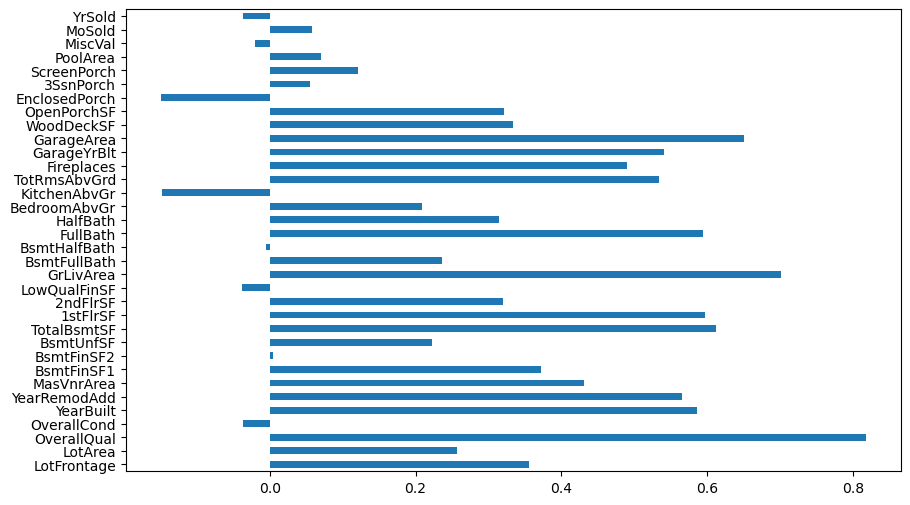

In [559]:
correlation_values = df_num.corr()["SalePrice"].drop("SalePrice")
correlation_values.plot(kind='barh', figsize=(10, 6))

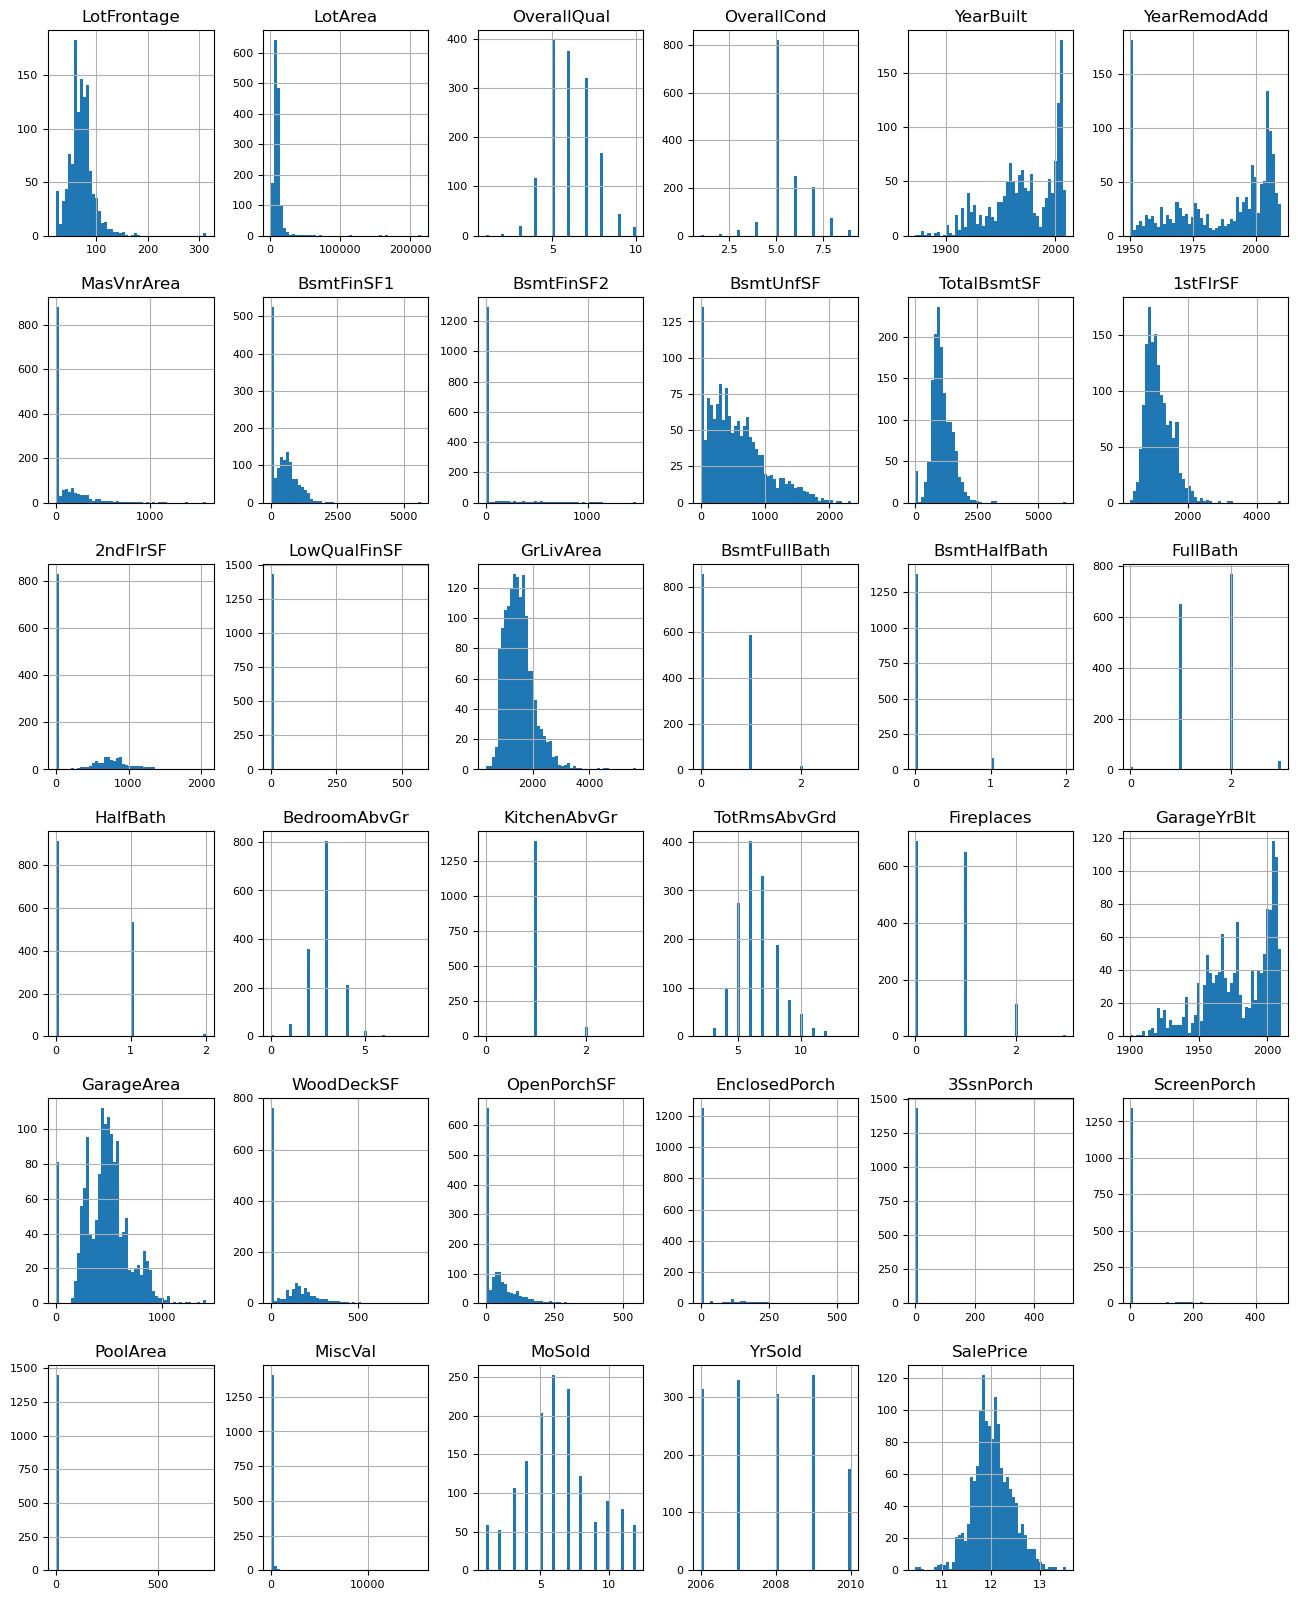

In [560]:
df_num.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8);


In [561]:
# dataset_df[['3SsnPorch']][dataset_df['3SsnPorch']>10].value_counts().sum()

In [562]:
# sns.violinplot(dataset_df[['3SsnPorch']])

In [563]:
# dataset_df = dataset_df.dropna(subset=['MasVnrArea', 'SalePrice'], how='any')
# # dataset_df = dataset_df.dropna(subset=['GarageYrBlt', 'GarageFinish'], how='any')
# dataset_df['LotFrontage'] = dataset_df['LotFrontage'].fillna(dataset_df['LotFrontage'].median())

In [564]:
# garage_nan_mapping = {"GarageYrBlt":-1, "GarageType": "NA", "GarageFinish": "NA", "GarageCars": 0, "GarageArea": 0, "GarageQual": "NA", "GarageCond":"NA"}
# dataset_df = dataset_df.fillna(value=nan_mapping)

In [565]:
print("NaN values remaining:", dataset_df.isnull().sum().sum())

NaN values remaining: 7829


In [566]:
print(dataset_df.isnull().sum()[dataset_df.isnull().sum() > 0])

LotFrontage      259
Alley           1369
MasVnrType       872
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64


In [567]:
dataset_df

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,12.247694
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,12.109011
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,12.317167
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,11.849398
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,12.429216
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,12.072541
1456,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,12.254863
1457,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,12.493130
1458,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,11.864462


In [568]:
# df_num = dataset_df.select_dtypes(include = ['float64', 'int64'])

In [569]:
# df_num['LotFrontage'] = df_num['LotFrontage'].fillna(df_num['LotFrontage'].median())
# # df_num.isna().sum()

In [570]:
# print("NaN values remaining:", df_num.isna().sum().sum())

In [571]:
# dataset_df = dataset_df.drop(columns=['Alley', 'MasVnrType', 'FireplaceQu','PoolQC','Fence','MiscFeature','MiscVal','LowQualFinSF','BsmtFinSF2','BsmtFinType2'])

In [572]:
# dataset_df['BsmtQual'] = dataset_df['BsmtQual'].replace(np.nan, dataset_df['BsmtQual'].value_counts().idxmax())
# dataset_df['BsmtCond'] = dataset_df['BsmtCond'].replace(np.nan, dataset_df['BsmtCond'].value_counts().idxmax())
# dataset_df['BsmtExposure'] = dataset_df['BsmtExposure'].replace(np.nan, dataset_df['BsmtExposure'].value_counts().idxmax())
# dataset_df['BsmtFinType1'] = dataset_df['BsmtFinType1'].replace(np.nan, dataset_df['BsmtFinType1'].value_counts().idxmax())
# # dataset_df['BsmtFinType2'] = dataset_df['BsmtFinType2'].replace(np.nan, dataset_df['BsmtFinType2'].value_counts().idxmax())
# dataset_df['Electrical'] = dataset_df['Electrical'].replace(np.nan, dataset_df['Electrical'].value_counts().idxmax())

In [573]:
dataset_df["HouseAgeAtSale"] = dataset_df["YrSold"].astype(float) - dataset_df["YearBuilt"].astype(float)
dataset_df["GarageAgeAtSale"] = dataset_df["YrSold"].astype(float) - dataset_df["GarageYrBlt"].astype(float)
dataset_df = dataset_df.drop(columns=["YrSold"], errors="ignore")

In [574]:
dataset_df["BsmtBath"] = dataset_df["BsmtFullBath"].astype(float) + 0.5 * dataset_df["BsmtHalfBath"].astype(float)
dataset_df["Bath"] = dataset_df["FullBath"].astype(float) + 0.5 * dataset_df["HalfBath"].astype(float)
dataset_df = dataset_df.drop(columns=['BsmtFullBath','BsmtHalfBath','FullBath','HalfBath'], errors="ignore")

In [575]:
quality_mapping = {"Ex": 5, "Gd": 4, "TA": 3, "Fa": 2, "Po": 1}
# Remplacer les valeurs
dataset_df["KitchenQual"] = dataset_df["KitchenQual"].replace(quality_mapping).astype(int)
# dataset_df = dataset_df.drop(columns=["KitchenQual"], errors="ignore")

/tmp/ipykernel_52915/1291931383.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dataset_df["KitchenQual"] = dataset_df["KitchenQual"].replace(quality_mapping).astype(int)


In [576]:
finish_mapping = {"Fin": 3, "RFn": 2, "Unf": 1}


# Remplacer les valeurs
dataset_df["GarageFinish"] = dataset_df["GarageFinish"].replace(finish_mapping)
dataset_df["GarageQual"] = dataset_df["GarageQual"].replace(quality_mapping)
dataset_df["GarageCond"] = dataset_df["GarageCond"].replace(quality_mapping)

# dataset_df = dataset_df.drop(columns=["GarageQual"], errors="ignore")

/tmp/ipykernel_52915/3448772247.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dataset_df["GarageFinish"] = dataset_df["GarageFinish"].replace(finish_mapping)
/tmp/ipykernel_52915/3448772247.py:6: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dataset_df["GarageQual"] = dataset_df["GarageQual"].replace(quality_mapping)
/tmp/ipykernel_52915/3448772247.py:7: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(cop

In [577]:
exposure_mapping = {"Gd": 3, "Av": 2, "Mn": 1, "No": 0}
# Remplacer les valeurs
dataset_df["BsmtQual"] = dataset_df["BsmtQual"].replace(quality_mapping)
dataset_df["BsmtCond"] = dataset_df["BsmtCond"].replace(quality_mapping)
dataset_df["BsmtExposure"] = dataset_df["BsmtExposure"].replace(exposure_mapping)
# dataset_df = dataset_df.drop(columns=["KitchenQual"], errors="ignore")

/tmp/ipykernel_52915/3286904787.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dataset_df["BsmtQual"] = dataset_df["BsmtQual"].replace(quality_mapping)
/tmp/ipykernel_52915/3286904787.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dataset_df["BsmtCond"] = dataset_df["BsmtCond"].replace(quality_mapping)
/tmp/ipykernel_52915/3286904787.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. 

In [578]:
dataset_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 79 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   MSSubClass       1460 non-null   object 
 1   MSZoning         1460 non-null   object 
 2   LotFrontage      1201 non-null   float64
 3   LotArea          1460 non-null   int64  
 4   Street           1460 non-null   object 
 5   Alley            91 non-null     object 
 6   LotShape         1460 non-null   object 
 7   LandContour      1460 non-null   object 
 8   Utilities        1460 non-null   object 
 9   LotConfig        1460 non-null   object 
 10  LandSlope        1460 non-null   object 
 11  Neighborhood     1460 non-null   object 
 12  Condition1       1460 non-null   object 
 13  Condition2       1460 non-null   object 
 14  BldgType         1460 non-null   object 
 15  HouseStyle       1460 non-null   object 
 16  OverallQual      1460 non-null   int64  
 17  OverallCond   

In [579]:
dataset_df.head(10)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,MiscFeature,MiscVal,MoSold,SaleType,SaleCondition,SalePrice,HouseAgeAtSale,GarageAgeAtSale,BsmtBath,Bath
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,NaN,0,2,WD,Normal,12.247694,5.0,5.0,1.0,2.5
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,NaN,0,5,WD,Normal,12.109011,31.0,31.0,0.5,2.0
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,NaN,0,9,WD,Normal,12.317167,7.0,7.0,1.0,2.5
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,NaN,0,2,WD,Abnorml,11.849398,91.0,8.0,1.0,1.0
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,NaN,0,12,WD,Normal,12.429216,8.0,8.0,1.0,2.5
5,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,Inside,...,Shed,700,10,WD,Normal,11.870600,16.0,16.0,1.0,1.5
6,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,Inside,...,NaN,0,8,WD,Normal,12.634603,3.0,3.0,1.0,2.0
7,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,Corner,...,Shed,350,11,WD,Normal,12.206073,36.0,36.0,1.0,2.5
8,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,Inside,...,NaN,0,4,WD,Abnorml,11.774520,77.0,77.0,0.0,2.0
9,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,Corner,...,NaN,0,1,WD,Normal,11.678440,69.0,69.0,1.0,1.0


In [580]:
# dataset_df.select_dtypes(include = ['O']).isna().sum()

In [581]:
print("NaN values remaining:", dataset_df.isnull().sum().sum())

NaN values remaining: 7910


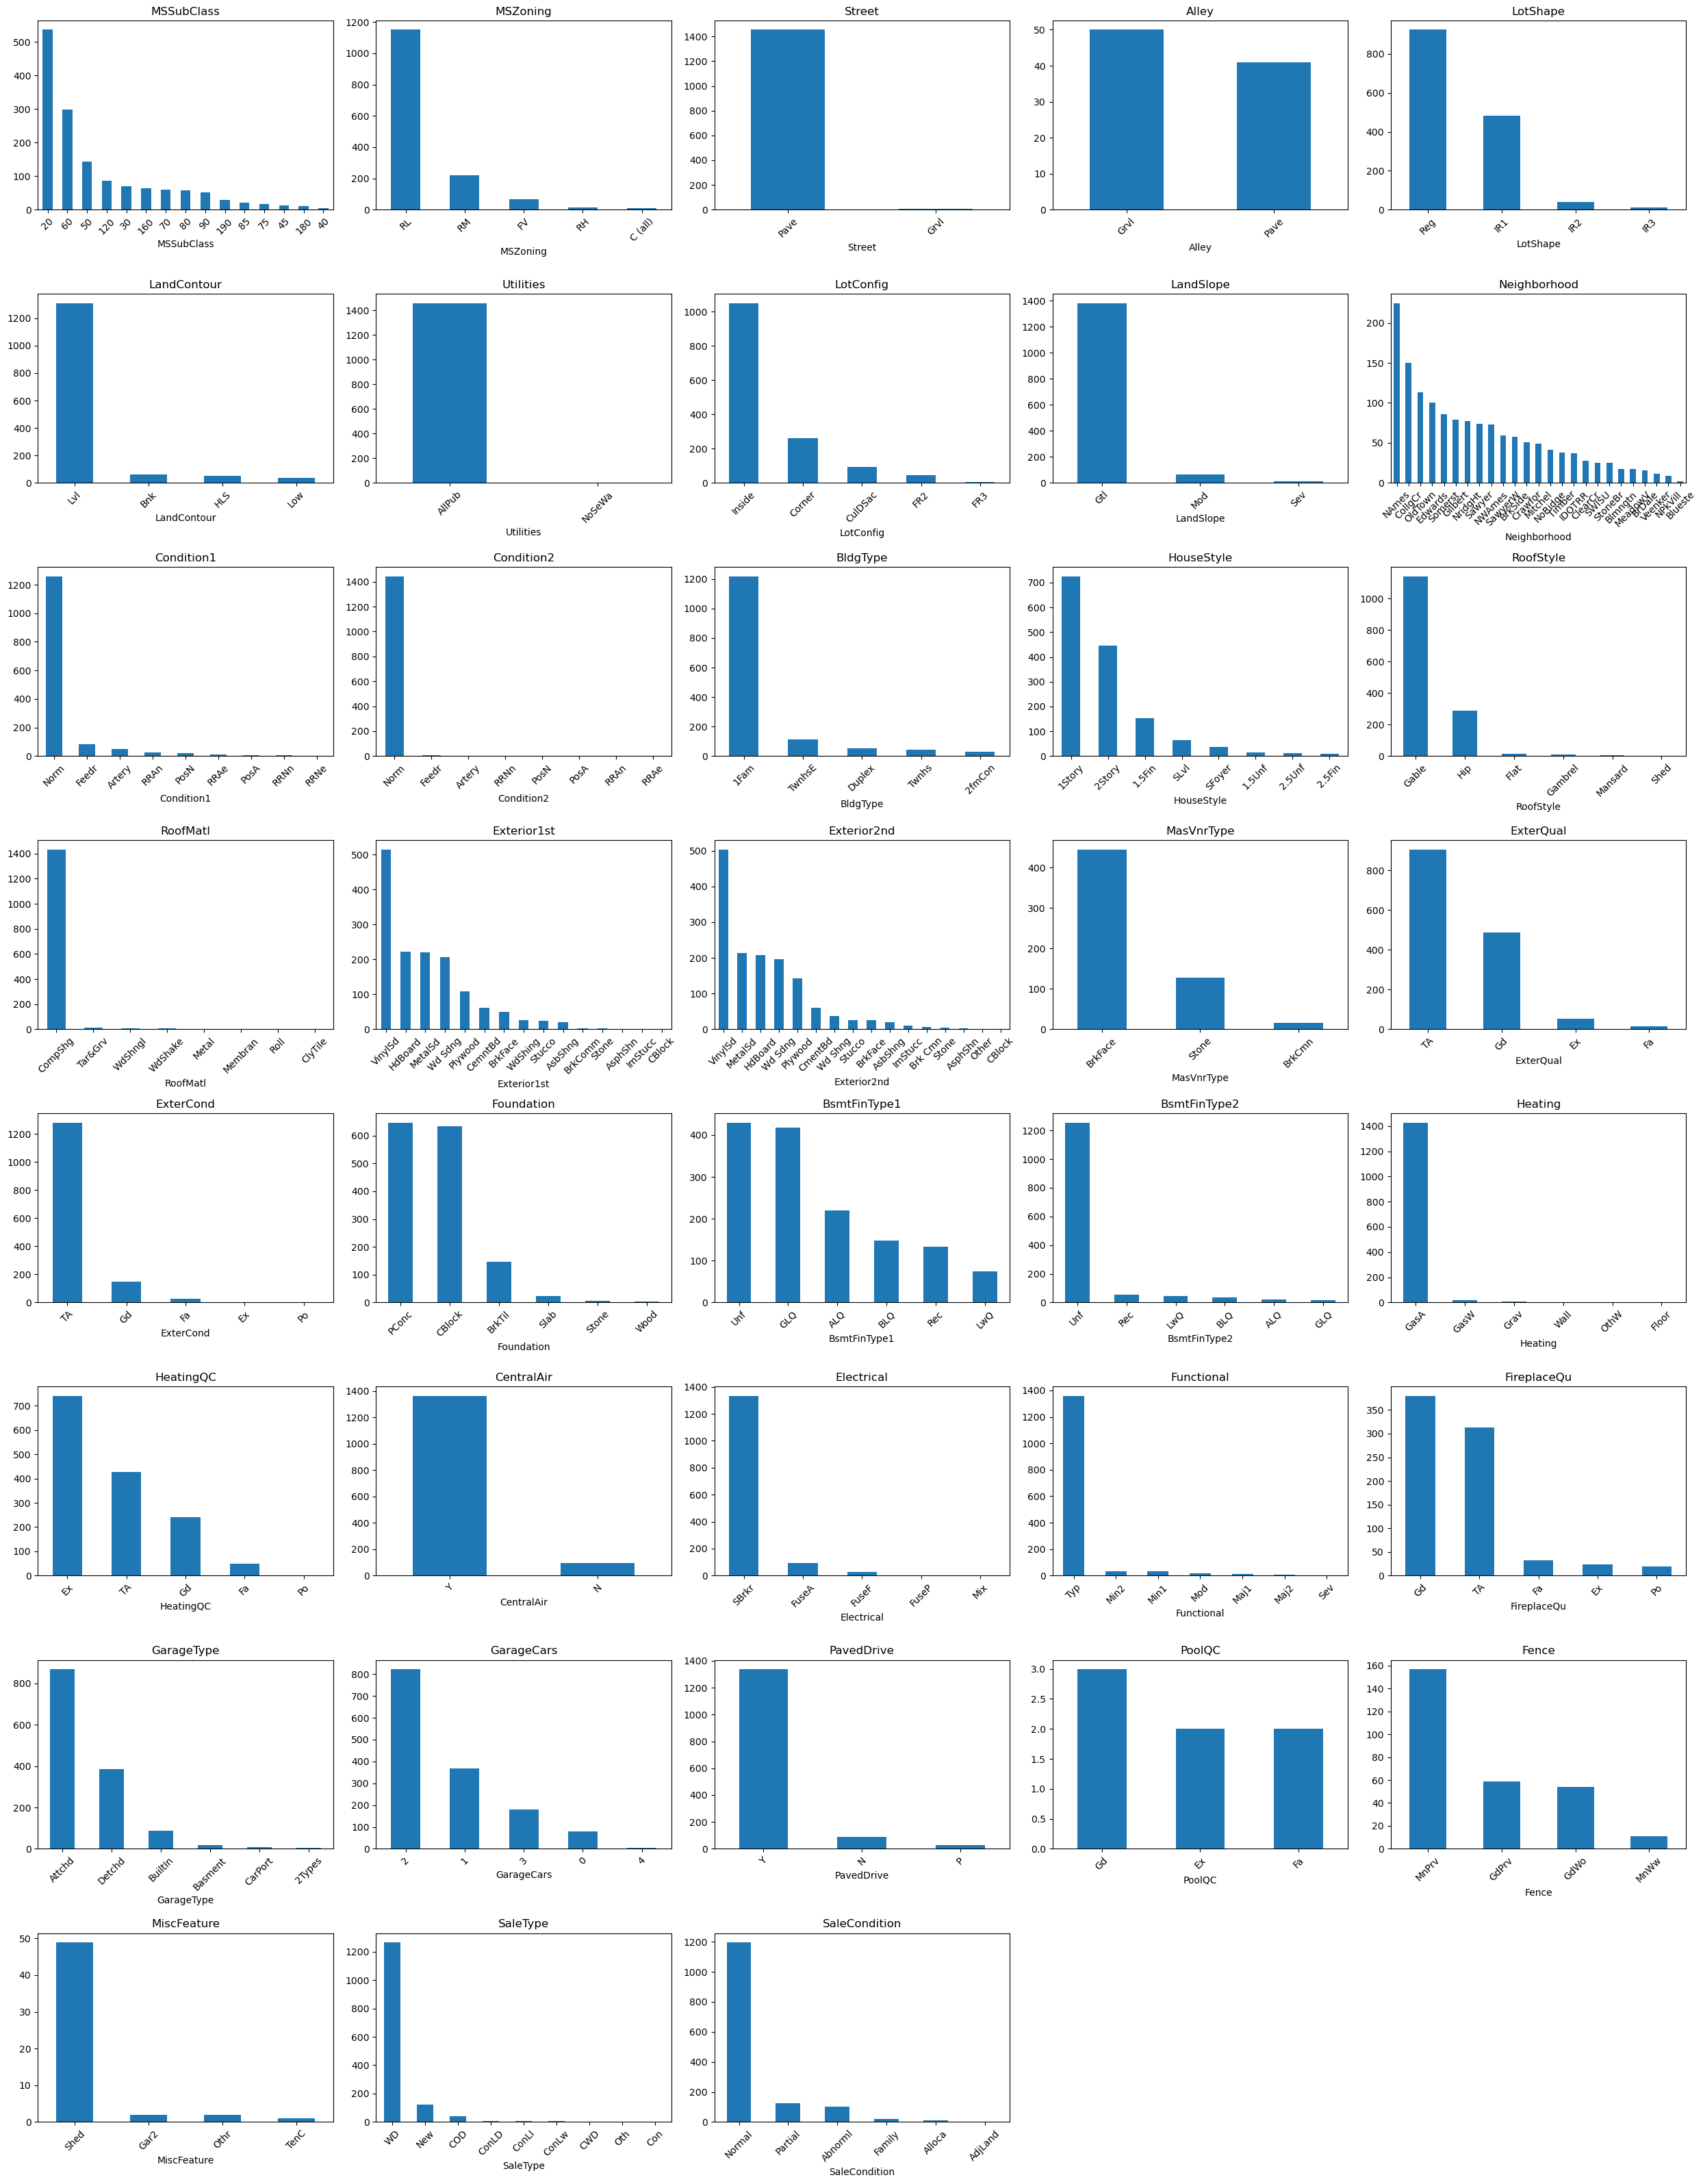

In [582]:
# dataset_df.select_dtypes(include = ['O']).plot.box(figsize=(16, 20));
cat_cols = dataset_df.select_dtypes(include=['object']).columns

# Déterminer la taille de la figure
n_cols = 5  # nombre de colonnes de subplots
n_rows = (len(cat_cols) + n_cols - 1) // n_cols  # nombre de lignes nécessaires

fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols*5, n_rows*4))
axes = axes.flatten()  # pour accéder facilement à chaque subplot

for i, col in enumerate(cat_cols):
    dataset_df[col].value_counts().plot(kind='bar', ax=axes[i], title=col)
    axes[i].tick_params(axis='x', rotation=45)

# Supprimer les axes vides si cat_cols n'est pas multiple de n_cols
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


In [583]:
# import numpy as np

# def split_dataset(dataset, test_ratio=0.30):
#   test_indices = np.random.rand(len(dataset)) < test_ratio
#   return dataset[~test_indices], dataset[test_indices]

# train_ds_pd, valid_ds_pd = split_dataset(dataset_df)
# print("{} examples in training, {} examples in testing.".format(
#     len(train_ds_pd), len(valid_ds_pd)))

Resolve hyper-parameter template "benchmark_rank1" to "benchmark_rank1@v1" -> {'winner_take_all': True, 'categorical_algorithm': 'RANDOM', 'split_axis': 'SPARSE_OBLIQUE', 'sparse_oblique_normalization': 'MIN_MAX', 'sparse_oblique_num_projections_exponent': 1.0}.
Use /tmp/tmp69xxz8lk as temporary training directory
Reading training dataset...
Training dataset read in 0:00:01.366458. Found 1168 examples.
Training model...


I0000 00:00:1756846407.727072   52915 kernel.cc:782] Start Yggdrasil model training
I0000 00:00:1756846407.728837   52915 kernel.cc:783] Collect training examples
I0000 00:00:1756846407.728943   52915 kernel.cc:795] Dataspec guide:
column_guides {
  column_name_pattern: "^__LABEL$"
  type: NUMERICAL
}
default_column_guide {
  categorial {
    max_vocab_count: 2000
  }
  discretized_numerical {
    maximum_num_bins: 255
  }
}
ignore_columns_without_guides: false
detect_numerical_as_discretized_numerical: false

I0000 00:00:1756846407.733868   52915 kernel.cc:401] Number of batches: 2
I0000 00:00:1756846407.734716   52915 kernel.cc:402] Number of examples: 1168
I0000 00:00:1756846407.738089   52915 data_spec_inference.cc:354] 1 item(s) have been pruned (i.e. they are considered out of dictionary) for the column Condition1 (8 item(s) left) because min_value_count=5 and max_number_of_unique_values=2000
I0000 00:00:1756846407.738239   52915 data_spec_inference.cc:354] 7 item(s) have been pr

Model trained in 0:00:05.278401
Compiling model...


I0000 00:00:1756846412.972971   52915 decision_forest.cc:808] Model loaded with 300 root(s), 111372 node(s), and 72 input feature(s).
I0000 00:00:1756846412.973640   52915 abstract_model.cc:1439] Engine "RandomForestGeneric" built
2025-09-02 20:53:32.973730: I tensorflow_decision_forests/tensorflow/ops/inference/kernel.cc:1035] Use fast generic engine


Model compiled.
Fold 1 RMSE: 0.14
Resolve hyper-parameter template "benchmark_rank1" to "benchmark_rank1@v1" -> {'winner_take_all': True, 'categorical_algorithm': 'RANDOM', 'split_axis': 'SPARSE_OBLIQUE', 'sparse_oblique_normalization': 'MIN_MAX', 'sparse_oblique_num_projections_exponent': 1.0}.
Use /tmp/tmpy4i8c5ch as temporary training directory
Reading training dataset...
Training dataset read in 0:00:00.812203. Found 1168 examples.
Training model...


I0000 00:00:1756846414.620257   52915 kernel.cc:782] Start Yggdrasil model training
I0000 00:00:1756846414.620358   52915 kernel.cc:783] Collect training examples
I0000 00:00:1756846414.620380   52915 kernel.cc:795] Dataspec guide:
column_guides {
  column_name_pattern: "^__LABEL$"
  type: NUMERICAL
}
default_column_guide {
  categorial {
    max_vocab_count: 2000
  }
  discretized_numerical {
    maximum_num_bins: 255
  }
}
ignore_columns_without_guides: false
detect_numerical_as_discretized_numerical: false

I0000 00:00:1756846414.620689   52915 kernel.cc:401] Number of batches: 2
I0000 00:00:1756846414.620701   52915 kernel.cc:402] Number of examples: 1168
I0000 00:00:1756846414.622303   52915 data_spec_inference.cc:354] 2 item(s) have been pruned (i.e. they are considered out of dictionary) for the column Condition1 (7 item(s) left) because min_value_count=5 and max_number_of_unique_values=2000
I0000 00:00:1756846414.622404   52915 data_spec_inference.cc:354] 5 item(s) have been pr

Model trained in 0:00:05.235702
Compiling model...


I0000 00:00:1756846419.827937   52915 decision_forest.cc:808] Model loaded with 300 root(s), 111158 node(s), and 74 input feature(s).
2025-09-02 20:53:39.828035: I tensorflow_decision_forests/tensorflow/ops/inference/kernel.cc:1035] Use fast generic engine


Model compiled.
Fold 2 RMSE: 0.14
Resolve hyper-parameter template "benchmark_rank1" to "benchmark_rank1@v1" -> {'winner_take_all': True, 'categorical_algorithm': 'RANDOM', 'split_axis': 'SPARSE_OBLIQUE', 'sparse_oblique_normalization': 'MIN_MAX', 'sparse_oblique_num_projections_exponent': 1.0}.
Use /tmp/tmpialu94wo as temporary training directory
Reading training dataset...
Training dataset read in 0:00:00.742954. Found 1168 examples.
Training model...


I0000 00:00:1756846421.403883   52915 kernel.cc:782] Start Yggdrasil model training
I0000 00:00:1756846421.403957   52915 kernel.cc:783] Collect training examples
I0000 00:00:1756846421.403977   52915 kernel.cc:795] Dataspec guide:
column_guides {
  column_name_pattern: "^__LABEL$"
  type: NUMERICAL
}
default_column_guide {
  categorial {
    max_vocab_count: 2000
  }
  discretized_numerical {
    maximum_num_bins: 255
  }
}
ignore_columns_without_guides: false
detect_numerical_as_discretized_numerical: false

I0000 00:00:1756846421.404181   52915 kernel.cc:401] Number of batches: 2
I0000 00:00:1756846421.404188   52915 kernel.cc:402] Number of examples: 1168
I0000 00:00:1756846421.405908   52915 data_spec_inference.cc:354] 3 item(s) have been pruned (i.e. they are considered out of dictionary) for the column Condition1 (6 item(s) left) because min_value_count=5 and max_number_of_unique_values=2000
I0000 00:00:1756846421.405991   52915 data_spec_inference.cc:354] 6 item(s) have been pr

Model trained in 0:00:05.845915
Compiling model...


I0000 00:00:1756846427.218839   52915 decision_forest.cc:808] Model loaded with 300 root(s), 111252 node(s), and 74 input feature(s).
I0000 00:00:1756846427.218992   52915 abstract_model.cc:1439] Engine "RandomForestGeneric" built
2025-09-02 20:53:47.219044: I tensorflow_decision_forests/tensorflow/ops/inference/kernel.cc:1035] Use fast generic engine


Model compiled.
Fold 3 RMSE: 0.13
Resolve hyper-parameter template "benchmark_rank1" to "benchmark_rank1@v1" -> {'winner_take_all': True, 'categorical_algorithm': 'RANDOM', 'split_axis': 'SPARSE_OBLIQUE', 'sparse_oblique_normalization': 'MIN_MAX', 'sparse_oblique_num_projections_exponent': 1.0}.
Use /tmp/tmpss1vwr__ as temporary training directory
Reading training dataset...
Training dataset read in 0:00:00.877750. Found 1168 examples.
Training model...


I0000 00:00:1756846428.974015   52915 kernel.cc:782] Start Yggdrasil model training
I0000 00:00:1756846428.974082   52915 kernel.cc:783] Collect training examples
I0000 00:00:1756846428.974112   52915 kernel.cc:795] Dataspec guide:
column_guides {
  column_name_pattern: "^__LABEL$"
  type: NUMERICAL
}
default_column_guide {
  categorial {
    max_vocab_count: 2000
  }
  discretized_numerical {
    maximum_num_bins: 255
  }
}
ignore_columns_without_guides: false
detect_numerical_as_discretized_numerical: false

I0000 00:00:1756846428.974296   52915 kernel.cc:401] Number of batches: 2
I0000 00:00:1756846428.974304   52915 kernel.cc:402] Number of examples: 1168
I0000 00:00:1756846428.975835   52915 data_spec_inference.cc:354] 1 item(s) have been pruned (i.e. they are considered out of dictionary) for the column Condition1 (8 item(s) left) because min_value_count=5 and max_number_of_unique_values=2000
I0000 00:00:1756846428.975918   52915 data_spec_inference.cc:354] 5 item(s) have been pr

Model trained in 0:00:05.820501
Compiling model...
Model compiled.
Fold 4 RMSE: 0.14
Resolve hyper-parameter template "benchmark_rank1" to "benchmark_rank1@v1" -> {'winner_take_all': True, 'categorical_algorithm': 'RANDOM', 'split_axis': 'SPARSE_OBLIQUE', 'sparse_oblique_normalization': 'MIN_MAX', 'sparse_oblique_num_projections_exponent': 1.0}.
Use /tmp/tmp5iq2eofw as temporary training directory
Reading training dataset...
Training dataset read in 0:00:00.677335. Found 1168 examples.
Training model...


I0000 00:00:1756846436.155852   52915 kernel.cc:782] Start Yggdrasil model training
I0000 00:00:1756846436.155937   52915 kernel.cc:783] Collect training examples
I0000 00:00:1756846436.155955   52915 kernel.cc:795] Dataspec guide:
column_guides {
  column_name_pattern: "^__LABEL$"
  type: NUMERICAL
}
default_column_guide {
  categorial {
    max_vocab_count: 2000
  }
  discretized_numerical {
    maximum_num_bins: 255
  }
}
ignore_columns_without_guides: false
detect_numerical_as_discretized_numerical: false

I0000 00:00:1756846436.156165   52915 kernel.cc:401] Number of batches: 2
I0000 00:00:1756846436.156172   52915 kernel.cc:402] Number of examples: 1168
I0000 00:00:1756846436.157413   52915 data_spec_inference.cc:354] 1 item(s) have been pruned (i.e. they are considered out of dictionary) for the column Condition1 (8 item(s) left) because min_value_count=5 and max_number_of_unique_values=2000
I0000 00:00:1756846436.157458   52915 data_spec_inference.cc:354] 6 item(s) have been pr

Model trained in 0:00:05.987214
Compiling model...


I0000 00:00:1756846442.092356   52915 decision_forest.cc:808] Model loaded with 300 root(s), 111074 node(s), and 73 input feature(s).
I0000 00:00:1756846442.092433   52915 abstract_model.cc:1439] Engine "RandomForestGeneric" built
2025-09-02 20:54:02.092459: I tensorflow_decision_forests/tensorflow/ops/inference/kernel.cc:1035] Use fast generic engine


Model compiled.
Fold 5 RMSE: 0.14


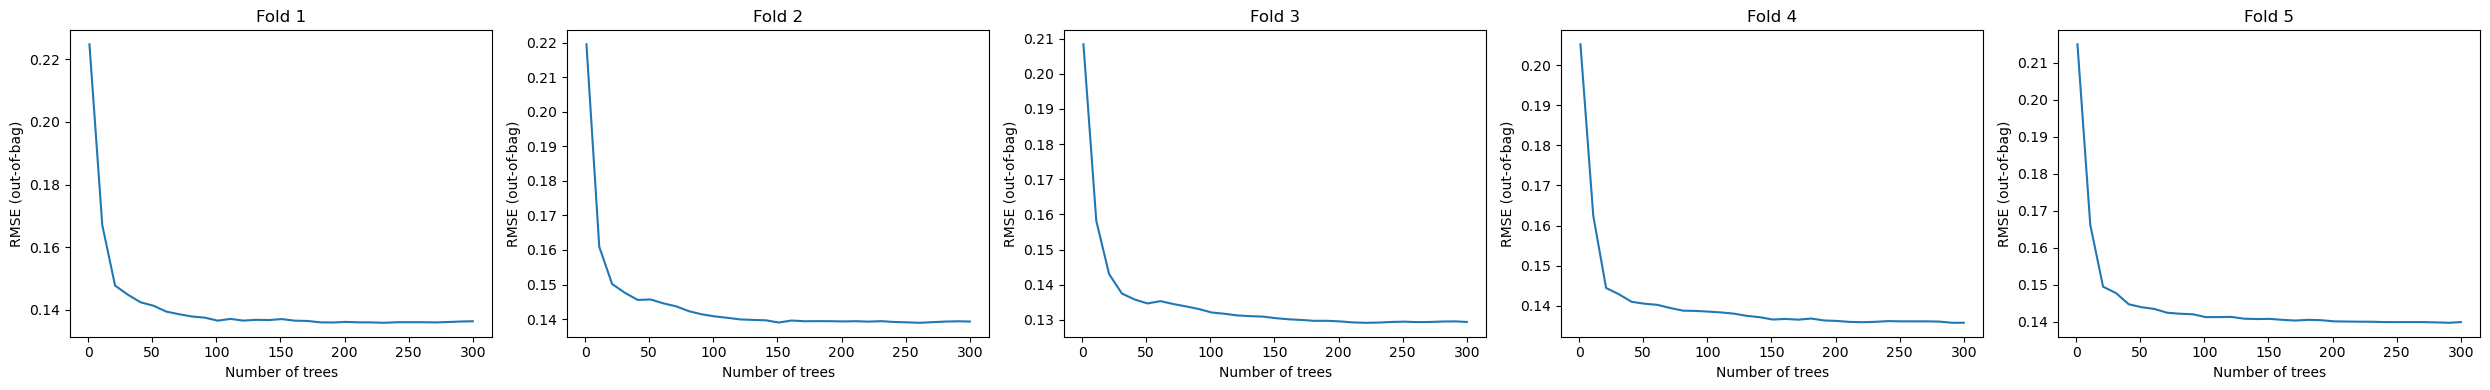

RMSE moyen sur les 5 folds : 0.136157814054279


In [584]:
dataset_df_rand = dataset_df.sample(frac=1, random_state=42).reset_index(drop=True)
n_splits = 5
rmse_scores = []
label = 'SalePrice'

# Préparer les subplots (1 ligne, n_splits colonnes)
fig, axes = plt.subplots(1, n_splits, figsize=(5 * n_splits, 4))

fold_size = len(dataset_df_rand) // n_splits

for i in range(n_splits):
    # Définir indices du fold
    test_start = i * fold_size
    test_end = (i + 1) * fold_size if i != n_splits - 1 else len(dataset_df_rand)

    df_test = dataset_df_rand.iloc[test_start:test_end]
    df_train = pd.concat([dataset_df_rand.iloc[:test_start], dataset_df_rand.iloc[test_end:]])

    # Convertir en tf.data.Dataset
    train_ds = tfdf.keras.pd_dataframe_to_tf_dataset(df_train, label=label, task=tfdf.keras.Task.REGRESSION)
    test_ds = tfdf.keras.pd_dataframe_to_tf_dataset(df_test, label=label, task=tfdf.keras.Task.REGRESSION)

    # Créer et entraîner le modèle
    model = tfdf.keras.RandomForestModel(hyperparameter_template="benchmark_rank1", task=tfdf.keras.Task.REGRESSION, random_seed=42)
    model.fit(train_ds)

    inspector = model.make_inspector()
    rmse = inspector.evaluation().rmse
    rmse_scores.append(rmse)
    print(f"Fold {i+1} RMSE: {rmse:.2f}")

    # Extraire les logs et tracer dans un subplot
    logs = model.make_inspector().training_logs()
    axes[i].plot([log.num_trees for log in logs], [log.evaluation.rmse for log in logs])
    axes[i].set_title(f"Fold {i+1}")
    axes[i].set_xlabel("Number of trees")
    axes[i].set_ylabel("RMSE (out-of-bag)")

plt.tight_layout()
plt.show()

print("RMSE moyen sur les 5 folds :", np.mean(rmse_scores))

In [585]:
# label = 'SalePrice'
# train_ds = tfdf.keras.pd_dataframe_to_tf_dataset(train_ds_pd, label=label, task = tfdf.keras.Task.REGRESSION)
# valid_ds = tfdf.keras.pd_dataframe_to_tf_dataset(valid_ds_pd, label=label, task = tfdf.keras.Task.REGRESSION)

In [586]:
# tfdf.keras.get_all_models()

In [587]:
# rf = tfdf.keras.RandomForestModel(hyperparameter_template="benchmark_rank1", task=tfdf.keras.Task.REGRESSION)
# rf.compile(metrics=["mse"])

In [588]:
# rf.fit(x=train_ds)

In [589]:
# from IPython.display import HTML, display
# import tensorflow_decision_forests as tfdf

# # rf is your trained model
# html = tfdf.model_plotter.plot_model(rf, tree_idx=0, max_depth=4)
# display(HTML(html))

In [590]:
# import matplotlib.pyplot as plt
# logs = rf.make_inspector().training_logs()
# plt.plot([log.num_trees for log in logs], [log.evaluation.rmse for log in logs])
# plt.xlabel("Number of trees")
# plt.ylabel("RMSE (out-of-bag)")
# plt.show()

In [591]:
# inspector = rf.make_inspector()
# inspector.evaluation()

In [592]:
# inspector.features()

In [593]:
# evaluation = rf.evaluate(x=valid_ds,return_dict=True)

# for name, value in evaluation.items():
#   print(f"{name}: {value:.4f}")

In [594]:
# print(f"Available variable importances:")
# for importance in inspector.variable_importances().keys():
#   print("\t", importance)

In [595]:
inspector.variable_importances()["NUM_AS_ROOT"]


[("OverallQual" (1; #62), 158.0),
 ("Bath" (1; #4), 43.0),
 ("GrLivArea" (1; #38), 42.0),
 ("KitchenQual" (1; #44), 29.0),
 ("HouseAgeAtSale" (1; #41), 27.0),
 ("TotalBsmtSF" (1; #73), 27.0),
 ("YearBuilt" (1; #76), 24.0),
 ("BsmtQual" (1; #14), 21.0),
 ("ExterQual" (4; #22), 20.0),
 ("GarageArea" (1; #31), 20.0),
 ("1stFlrSF" (1; #0), 15.0),
 ("GarageYrBlt" (1; #37), 15.0),
 ("MiscVal" (1; #57), 15.0),
 ("LotArea" (1; #47), 14.0),
 ("Fireplaces" (1; #27), 12.0),
 ("OpenPorchSF" (1; #60), 11.0),
 ("3SsnPorch" (1; #2), 10.0),
 ("TotRmsAbvGrd" (1; #72), 10.0),
 ("BsmtCond" (1; #8), 9.0),
 ("PoolArea" (1; #64), 9.0),
 ("BsmtFinSF1" (1; #10), 8.0),
 ("LowQualFinSF" (1; #51), 8.0),
 ("GarageAgeAtSale" (1; #30), 7.0),
 ("GarageCond" (1; #33), 7.0),
 ("KitchenAbvGr" (1; #43), 7.0),
 ("LotFrontage" (1; #49), 7.0),
 ("EnclosedPorch" (1; #20), 6.0),
 ("GarageFinish" (1; #34), 6.0),
 ("BedroomAbvGr" (1; #5), 5.0),
 ("BsmtFinSF2" (1; #11), 5.0),
 ("GarageQual" (1; #35), 5.0),
 ("YearRemodAdd" (1; 

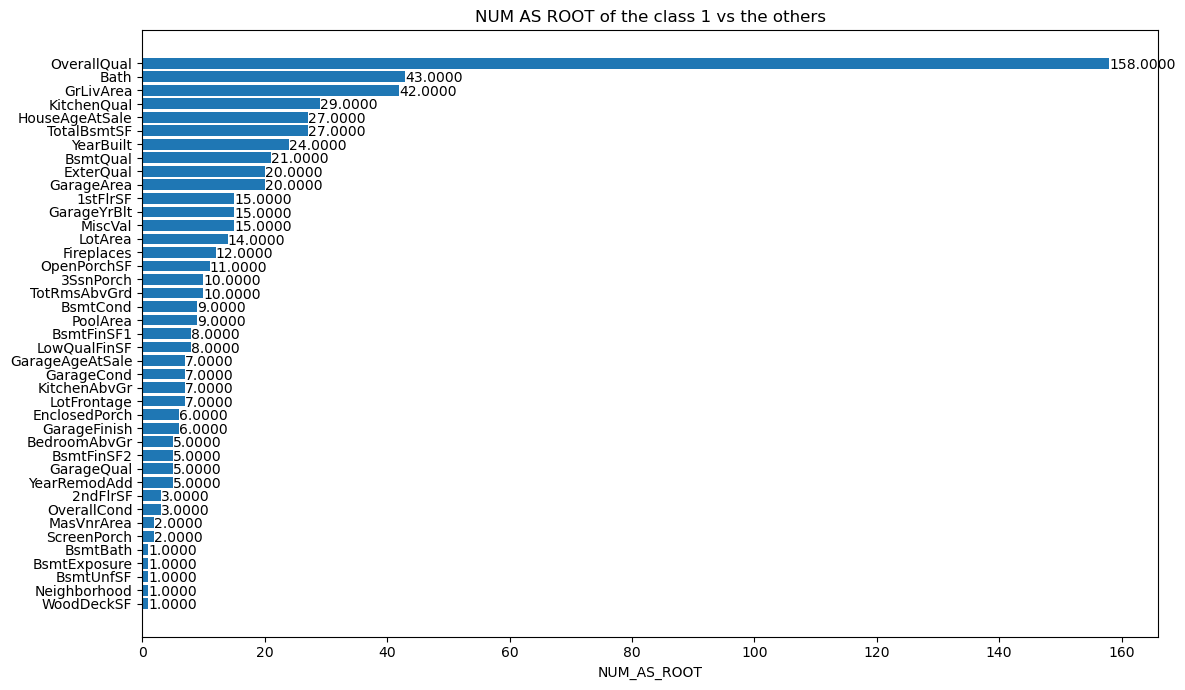

In [596]:
plt.figure(figsize=(12, 7))

# Mean decrease in AUC of the class 1 vs the others.
variable_importance_metric = "NUM_AS_ROOT"
variable_importances = inspector.variable_importances()[variable_importance_metric]

# Extract the feature name and importance values.
#
# `variable_importances` is a list of <feature, importance> tuples.
feature_names = [vi[0].name for vi in variable_importances]
feature_importances = [vi[1] for vi in variable_importances]
# The feature are ordered in decreasing importance value.
feature_ranks = range(len(feature_names))

bar = plt.barh(feature_ranks, feature_importances, label=[str(x) for x in feature_ranks])
plt.yticks(feature_ranks, feature_names)
plt.gca().invert_yaxis()

# TODO: Replace with "plt.bar_label()" when available.
# Label each bar with values
for importance, patch in zip(feature_importances, bar.patches):
  plt.text(patch.get_x() + patch.get_width(), patch.get_y(), f"{importance:.4f}", va="top")

plt.xlabel(variable_importance_metric)
plt.title("NUM AS ROOT of the class 1 vs the others")
plt.tight_layout()
plt.show()

In [598]:
test_file_path = "../data/test.csv"
test_data = pd.read_csv(test_file_path)
ids = test_data.pop('Id')

test_data["HouseAgeAtSale"] = test_data["YrSold"].astype(float) - test_data["YearBuilt"].astype(float)
test_data["GarageAgeAtSale"] = test_data["YrSold"].astype(float) - test_data["GarageYrBlt"].astype(float)
test_data = test_data.drop(columns=["YrSold"], errors="ignore")

test_data["BsmtBath"] = test_data["BsmtFullBath"].astype(float) + 0.5 * test_data["BsmtHalfBath"].astype(float)
test_data["Bath"] = test_data["FullBath"].astype(float) + 0.5 * test_data["HalfBath"].astype(float)
test_data = test_data.drop(columns=['BsmtFullBath','BsmtHalfBath','FullBath','HalfBath'], errors="ignore")

quality_mapping = {"Ex": 5, "Gd": 4, "TA": 3, "Fa": 2, "Po": 1}
# Remplacer les valeurs
test_data["KitchenQual"] = test_data["KitchenQual"].replace(quality_mapping)
# test_data = dataset_df.drop(columns=["KitchenQual"], errors="ignore")

finish_mapping = {"Fin": 3, "RFn": 2, "Unf": 1}
# Remplacer les valeurs
test_data["GarageFinish"] = test_data["GarageFinish"].replace(finish_mapping)
test_data["GarageQual"] = test_data["GarageQual"].replace(quality_mapping)
test_data["GarageCond"] = test_data["GarageCond"].replace(quality_mapping)
# test_data = test_data.drop(columns=["GarageQual"], errors="ignore")

exposure_mapping = {"Gd": 3, "Av": 2, "Mn": 1, "No": 0}
# Remplacer les valeurs
test_data["BsmtQual"] = test_data["BsmtQual"].replace(quality_mapping)
test_data["BsmtCond"] = test_data["BsmtCond"].replace(quality_mapping)
test_data["BsmtExposure"] = test_data["BsmtExposure"].replace(exposure_mapping)

test_ds = tfdf.keras.pd_dataframe_to_tf_dataset(
    test_data,
    task = tfdf.keras.Task.REGRESSION)

preds = model.predict(test_ds)
output = pd.DataFrame({'Id': ids,
                       'SalePrice': preds.squeeze()})
output['SalePrice']= output['SalePrice'].apply(lambda x: np.exp(x))


output.head()

/tmp/ipykernel_52915/3279998126.py:15: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  test_data["KitchenQual"] = test_data["KitchenQual"].replace(quality_mapping)
/tmp/ipykernel_52915/3279998126.py:20: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  test_data["GarageFinish"] = test_data["GarageFinish"].replace(finish_mapping)
/tmp/ipykernel_52915/3279998126.py:21: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(co

2/2 [==============================] - 1s 36ms/step


,Id,SalePrice
0,1461,126677.547271
1,1462,151916.100828
2,1463,177573.365567
3,1464,185011.427875
4,1465,197003.375656


In [600]:
sample_submission_df = pd.read_csv('../data/sample_submission.csv')
sample_submission_df['SalePrice'] = model.predict(test_ds)
sample_submission_df['SalePrice']= sample_submission_df['SalePrice'].apply(lambda x: np.exp(x))
sample_submission_df.to_csv('../submissions/submission7_log_SalePrice.csv', index=False)
sample_submission_df.head()

2/2 [==============================] - 0s 34ms/step


,Id,SalePrice
0,1461,126677.547271
1,1462,151916.100828
2,1463,177573.365567
3,1464,185011.427875
4,1465,197003.375656


In [ ]:
# kaggle competitions submit -c house-prices-advanced-regression-techniques -f work/submissions/submission.csv -m "First try"